In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import csv

In [16]:
np.random.seed(238746)

import warnings
warnings.filterwarnings('ignore')


In [18]:
# select the style from fivethityeight website
mpl.rcdefaults()
plt.style.use('fivethirtyeight')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams.update({'font.size': 16})

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

np.random.seed(238746)

In [4]:
#wiseairdata=pd.read_csv(r"C:\Users\neg\PycharmProjects\AirQualityForecasting\wiseairdata.csv")
wiseairdata=pd.read_csv("./wiseairdata.csv")

In [5]:
wiseairdata.head()

,created_at,id,location_id,pot_id,pm2p5,pm10,pm1SPS,pm2p5SPS,pm4SPS,pm10SPS,...,rssi_dbm,consecutive_successful_measures,consecutive_failed_measures,temperature_sht,humidity_sht,semver,firmware_version_id,seconds_until_next_measure,anomaly,is_healthy
0,2020-09-04 22:23:31,644775,99,1157,10,9.93,9.39,10,9.93,9.93,...,-52,0.0,0.0,-9.05,20.52,0.3.20,349,300,0,0
1,2020-09-04 22:25:28,644783,99,1157,13,13.26,12.54,13,13.26,13.26,...,-62,0.0,0.0,-7.86,17.70,0.3.28,357,300,0,0
2,2020-09-04 22:30:15,644822,99,1157,14,14.06,13.30,14,14.06,14.06,...,-54,1.0,0.0,-8.53,29.28,0.3.28,357,300,0,0
3,2020-09-04 22:35:14,644858,99,1157,13,13.49,12.75,13,13.49,13.49,...,-51,2.0,0.0,-8.60,26.16,0.3.28,357,300,0,0
4,2020-09-04 22:40:14,644871,99,1157,14,14.04,13.28,14,14.04,14.04,...,-50,3.0,0.0,-8.67,25.66,0.3.28,357,300,0,0


In [6]:
wiseairdata.created_at = pd.to_datetime(wiseairdata.created_at)
wiseairdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490693 entries, 0 to 490692
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   created_at                       490693 non-null  datetime64[ns]
 1   id                               490693 non-null  int64         
 2   location_id                      490693 non-null  int64         
 3   pot_id                           490693 non-null  int64         
 4   pm2p5                            490693 non-null  int64         
 5   pm10                             490693 non-null  float64       
 6   pm1SPS                           490693 non-null  float64       
 7   pm2p5SPS                         490693 non-null  int64         
 8   pm4SPS                           490693 non-null  float64       
 9   pm10SPS                          490693 non-null  float64       
 10  millisSpentMeasuring             490691 non-

In [7]:
wiseairdata.set_index('created_at', inplace=True)
wiseairdata.head()

,id,location_id,pot_id,pm2p5,pm10,pm1SPS,pm2p5SPS,pm4SPS,pm10SPS,millisSpentMeasuring,...,rssi_dbm,consecutive_successful_measures,consecutive_failed_measures,temperature_sht,humidity_sht,semver,firmware_version_id,seconds_until_next_measure,anomaly,is_healthy
created_at,,,,,,,,,,,,,,,,,,,,,
2020-09-04 22:23:31,644775,99,1157,10,9.93,9.39,10,9.93,9.93,11370.0,...,-52,0.0,0.0,-9.05,20.52,0.3.20,349,300,0,0
2020-09-04 22:25:28,644783,99,1157,13,13.26,12.54,13,13.26,13.26,11370.0,...,-62,0.0,0.0,-7.86,17.70,0.3.28,357,300,0,0
2020-09-04 22:30:15,644822,99,1157,14,14.06,13.30,14,14.06,14.06,11370.0,...,-54,1.0,0.0,-8.53,29.28,0.3.28,357,300,0,0
2020-09-04 22:35:14,644858,99,1157,13,13.49,12.75,13,13.49,13.49,11370.0,...,-51,2.0,0.0,-8.60,26.16,0.3.28,357,300,0,0
2020-09-04 22:40:14,644871,99,1157,14,14.04,13.28,14,14.04,14.04,11369.0,...,-50,3.0,0.0,-8.67,25.66,0.3.28,357,300,0,0


In [8]:
dati=wiseairdata.loc[wiseairdata['pot_id'].isin([1103,1109,1116,1094,1095])]

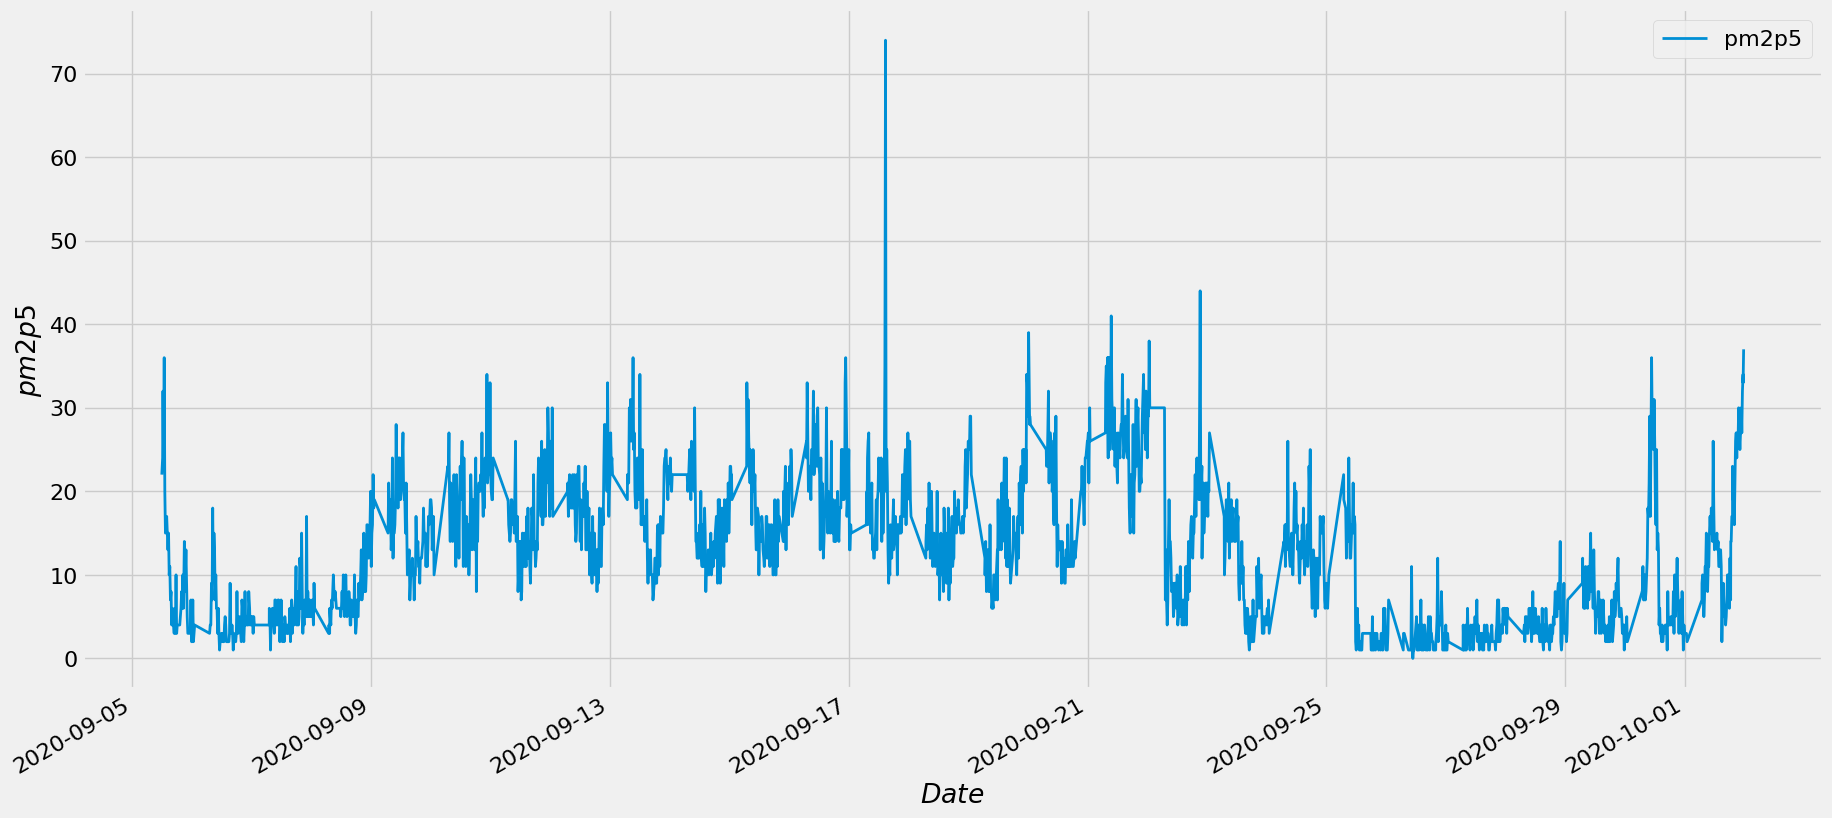

In [9]:
dati[dati['pot_id']==1103]['pm2p5']['2020-09-01':'2020-10-01'].plot(subplots=True, figsize=(10,6))
plt.gcf().set_size_inches(20, 10)
plt.gca().set(ylabel='$pm2p5$', xlabel='$Date$')
plt.legend()
plt.show()

In [10]:
wiseairdata = wiseairdata['2020-09-01':'2020-09-30']

wiseairdata['month'] = [d.strftime('%b') for d in wiseairdata.index]
wiseairdata['day'] = [d.strftime('%d') for d in wiseairdata.index]

In [11]:
wiseair_pot_id=wiseairdata.loc[wiseairdata['pot_id'].isin([1029, 1004, 1009, 1017, 1058, 1062, 1056, 1043, 1023, 1050, 1060, 1049, 1067, 1088])]

data_pot_id=wiseair_pot_id['pot_id'].unique()

mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(data_pot_id), replace=False)

In [12]:
print(data_pot_id)

# ragruppa i dati in base al pot_id
wiseair_avg = wiseair_pot_id.groupby('pot_id', as_index=False)

[1029 1004 1009 1017 1058 1062 1056 1043 1023 1050 1060 1049 1067 1088]


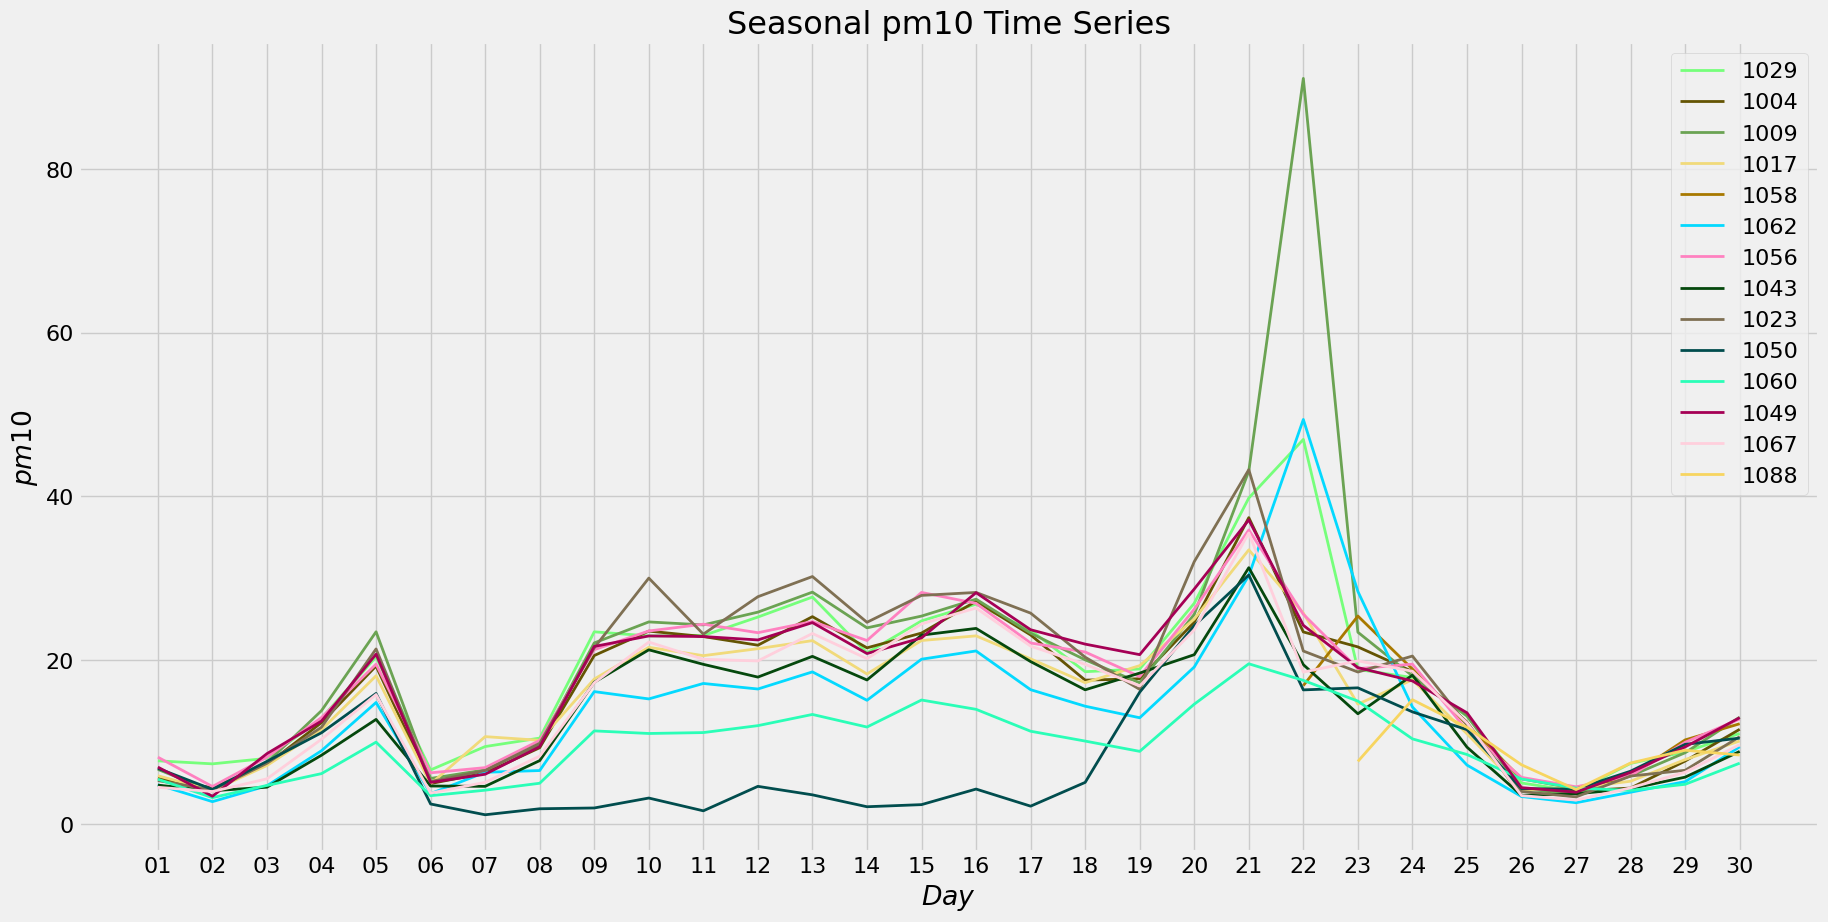

In [13]:
plt.figure(figsize=(8,6))    
for i, y in enumerate(data_pot_id):
    # fai la media giornaliera per il pot y
    tmp = wiseair_avg.get_group(y).resample('D').mean()
    # aggiungi una colonna day per questo gruppo
    tmp['day'] = [d.strftime('%d') for d in tmp.index]
    
    # plotta
    plt.plot('day', 'pm10', data=tmp, color=mycolors[i], label=y)
        
plt.gcf().set_size_inches(20, 10)
plt.gca().set( ylabel='$pm10$', xlabel='$Day$')
plt.title("Seasonal pm10 Time Series")
plt.legend()
plt.show()

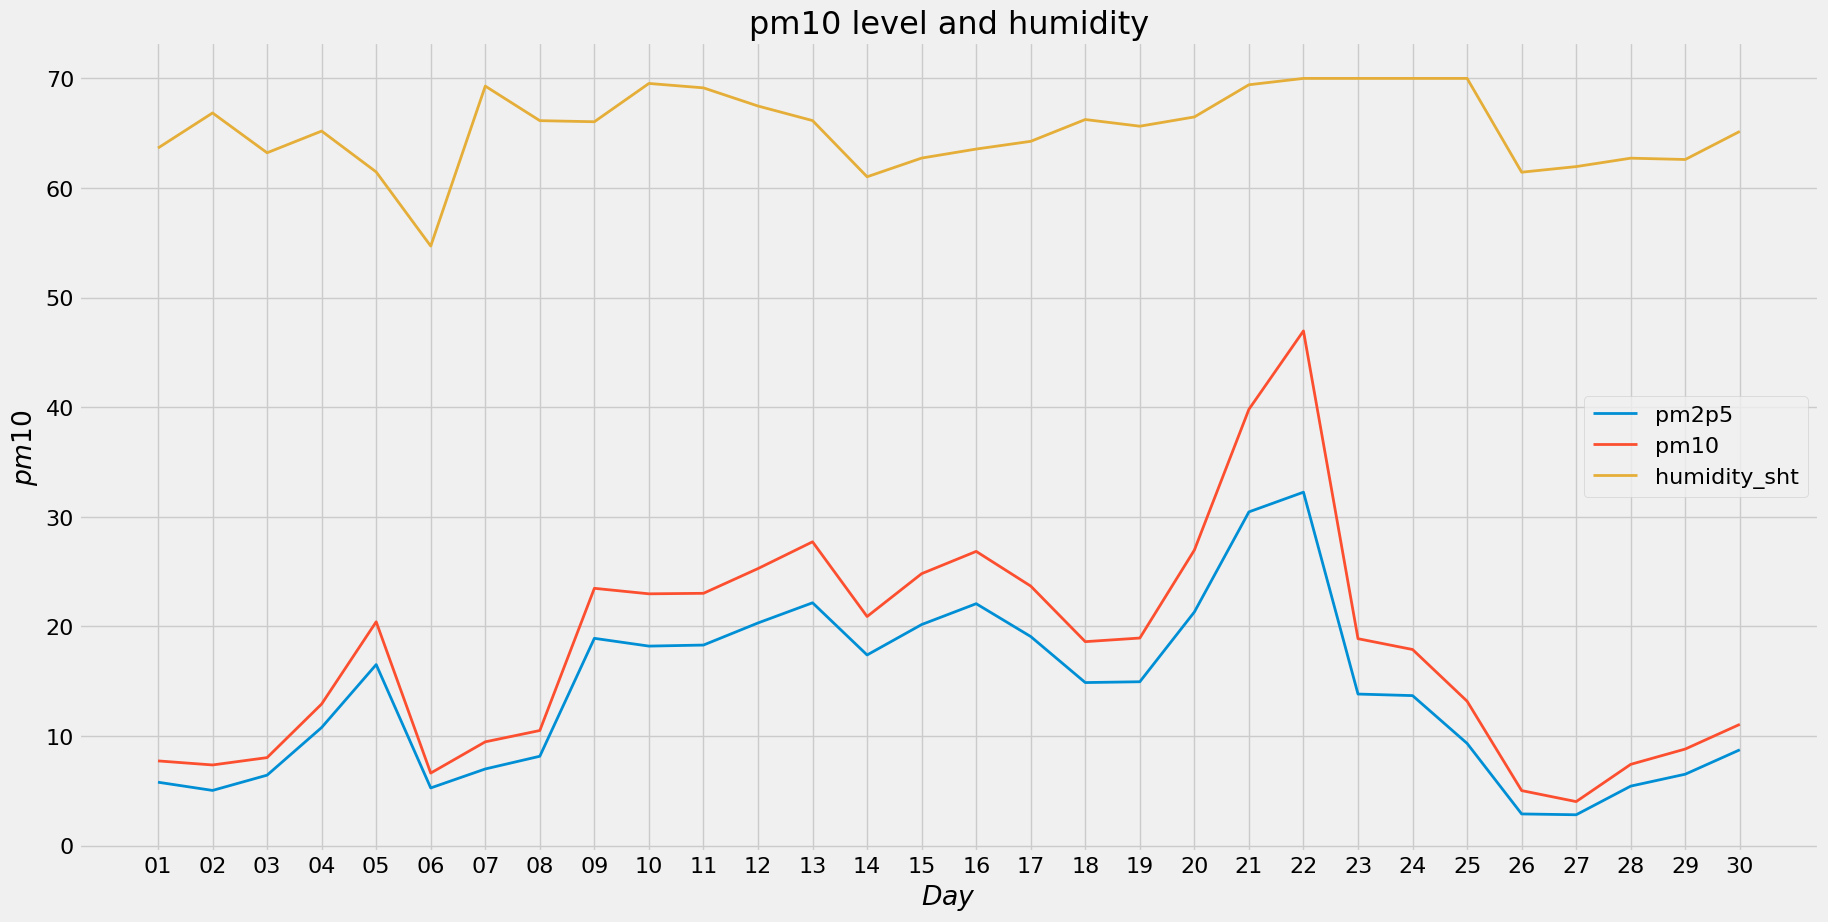

In [14]:
# plot umidità e pm10

# fai la media giornaliera per il pot y
tmp = wiseair_avg.get_group(1029).resample('D').mean()
# aggiungi una colonna day per questo gruppo
tmp['day'] = [d.strftime('%d') for d in tmp.index]

plt.plot('day', 'pm2p5', data=tmp)
plt.plot('day', 'pm10', data=tmp)
plt.plot('day', 'humidity_sht', data=tmp)

plt.gcf().set_size_inches(20, 10)
plt.gca().set( ylabel='$pm10$', xlabel='$Day$')
plt.title("pm10 level and humidity")
plt.legend()
plt.show()

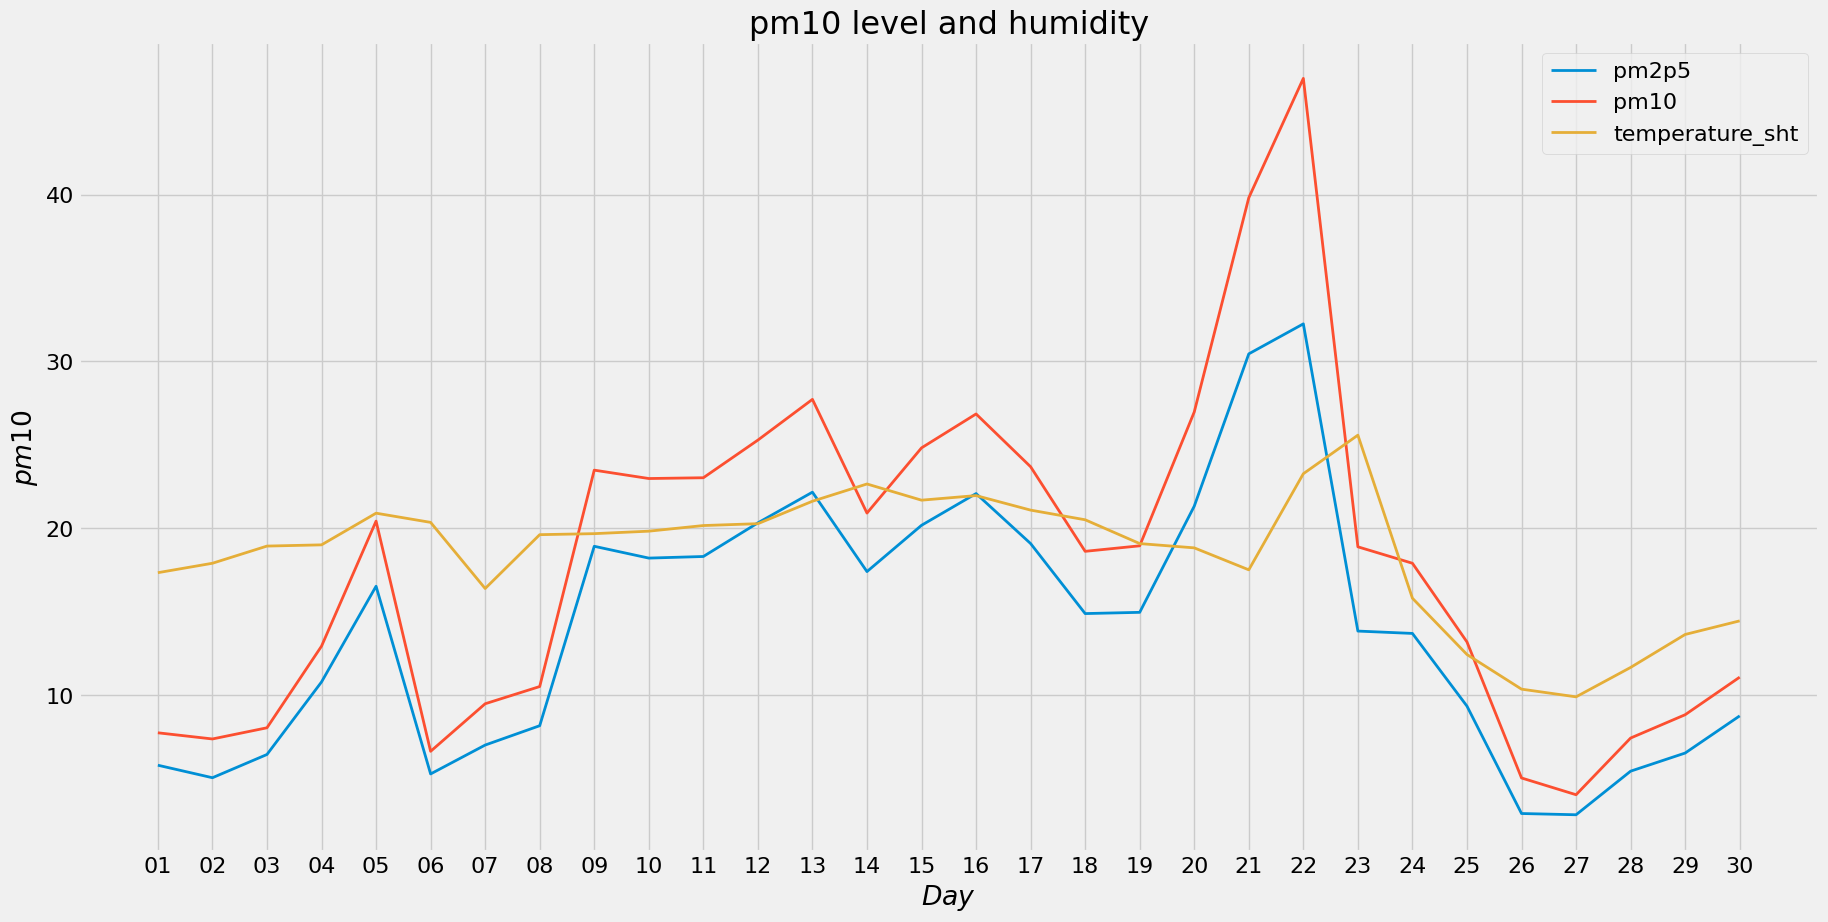

In [15]:
# plot temperatura e pm10

# fai la media giornaliera per il pot y
tmp = wiseair_avg.get_group(1029).resample('D').mean()
# aggiungi una colonna day per questo gruppo
tmp['day'] = [d.strftime('%d') for d in tmp.index]

plt.plot('day', 'pm2p5', data=tmp)
plt.plot('day', 'pm10', data=tmp)
plt.plot('day', 'temperature_sht', data=tmp)

plt.gcf().set_size_inches(20, 10)
plt.gca().set( ylabel='$pm10$', xlabel='$Day$')
plt.title("pm10 level and humidity")
plt.legend()
plt.show()

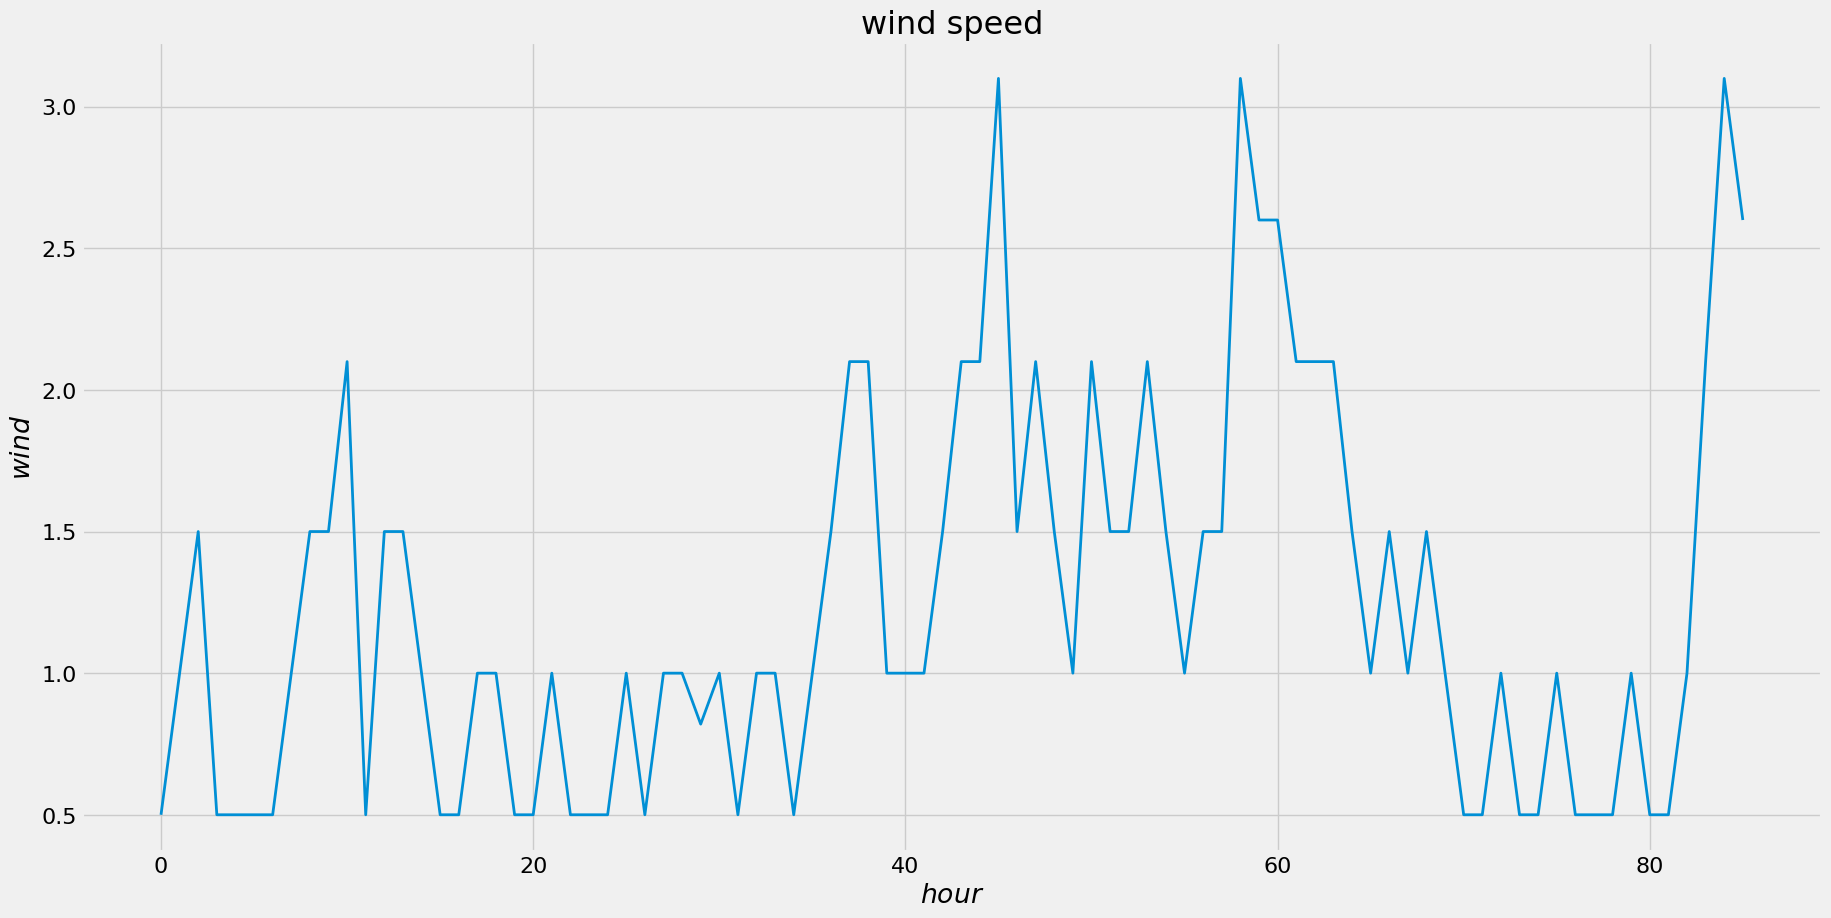

In [28]:
# try to access openweather data

import requests
import json

from datetime import timezone
from datetime import datetime
dt = datetime(2020, 10, 20)
timestamp = int(dt.replace(tzinfo=timezone.utc).timestamp())

api_key = "87715dd7d6b3e559e4b290a4d492828f"

# coordinate di Milano
lat = "45.464664"
lon = "9.188540"

url = "https://api.openweathermap.org/data/2.5/onecall/timemachine?lat=%s&lon=%s&dt=%s&appid=%s&units=metric" % (lat, lon, timestamp, api_key)

response = requests.get(url)
data = json.loads(response.text)

wind = []
for d in data['hourly']:
    wind.append(d['wind_speed'])

dt = datetime(2020, 10, 21)
timestamp = int(dt.replace(tzinfo=timezone.utc).timestamp())

api_key = "87715dd7d6b3e559e4b290a4d492828f"
lat = "45.464664"
lon = "9.188540"

url = "https://api.openweathermap.org/data/2.5/onecall/timemachine?lat=%s&lon=%s&dt=%s&appid=%s&units=metric" % (lat, lon, timestamp, api_key)

response = requests.get(url)
data = json.loads(response.text)

for d in data['hourly']:
    wind.append(d['wind_speed'])

    
dt = datetime(2020, 10, 22)
timestamp = int(dt.replace(tzinfo=timezone.utc).timestamp())

api_key = "87715dd7d6b3e559e4b290a4d492828f"
lat = "45.464664"
lon = "9.188540"

url = "https://api.openweathermap.org/data/2.5/onecall/timemachine?lat=%s&lon=%s&dt=%s&appid=%s&units=metric" % (lat, lon, timestamp, api_key)

response = requests.get(url)
data = json.loads(response.text)

for d in data['hourly']:
    wind.append(d['wind_speed'])
    
    
dt = datetime(2020, 10, 23)
timestamp = int(dt.replace(tzinfo=timezone.utc).timestamp())

api_key = "87715dd7d6b3e559e4b290a4d492828f"
lat = "45.464664"
lon = "9.188540"

url = "https://api.openweathermap.org/data/2.5/onecall/timemachine?lat=%s&lon=%s&dt=%s&appid=%s&units=metric" % (lat, lon, timestamp, api_key)

response = requests.get(url)
data = json.loads(response.text)

for d in data['hourly']:
    wind.append(d['wind_speed'])

plt.gcf().set_size_inches(20, 10)
plt.gca().set( ylabel='$wind$', xlabel='$hour$')
plt.title("wind speed")
plt.plot(wind)
plt.show()